In [1]:
library('tidyverse')
library('ggplot2')
library('skimr')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
train_trans <- read_csv('../input/ieee-fraud-detection/train_transaction.csv')
train_id <- read_csv('../input/ieee-fraud-detection/train_identity.csv')
test_trans <- read_csv('../input/ieee-fraud-detection/test_transaction.csv')
test_id <- read_csv('../input/ieee-fraud-detection/test_identity.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  ProductCD = col_character(),
  card4 = col_character(),
  card6 = col_character(),
  P_emaildomain = col_character(),
  R_emaildomain = col_character(),
  M1 = col_logical(),
  M2 = col_logical(),
  M3 = col_logical(),
  M4 = col_character(),
  M5 = col_logical(),
  M6 = col_logical(),
  M7 = col_logical(),
  M8 = col_logical(),
  M9 = col_logical()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  id_12 = col_character(),
  id_15 = col_character(),
  id_16 = col_character(),
  id_23 = col_character(),
  id_27 = col_character(),
  id_28 = col_character(),
  id_29 = col_character(),
  id_30 = col_character(),
  id_31 = col_character(),
  id_33 = col_character(),
  id_34 = col_character(),
  id_35 = col_logical(),
  id_36 = col_logical(),
  id_37 = col_

In [4]:
train <- left_join(train_trans,train_id)
test <- left_join(test_trans,test_id)
rm(train_id, train_trans,test_id,test_trans); invisible(gc())

Joining, by = "TransactionID"

Joining, by = "TransactionID"



In [5]:
colnames(test)[which(names(test) =="id-01")] <-"id_01"
colnames(test)[which(names(test) =="id-02")] <-"id_02"
colnames(test)[which(names(test) =="id-03")] <-"id_03"
colnames(test)[which(names(test) =="id-04")] <-"id_04"
colnames(test)[which(names(test) =="id-05")] <-"id_05"
colnames(test)[which(names(test) =="id-06")] <-"id_06"
colnames(test)[which(names(test) =="id-09")] <-"id_09"
colnames(test)[which(names(test) =="id-10")] <-"id_10"
colnames(test)[which(names(test) =="id-11")] <-"id_11"
colnames(test)[which(names(test) =="id-12")] <-"id_12"
colnames(test)[which(names(test) =="id-13")] <-"id_13"
colnames(test)[which(names(test) =="id-14")] <-"id_14"
colnames(test)[which(names(test) =="id-15")] <-"id_15"
colnames(test)[which(names(test) =="id-16")] <-"id_16"
colnames(test)[which(names(test) =="id-17")] <-"id_17"
colnames(test)[which(names(test) =="id-18")] <-"id_18"
colnames(test)[which(names(test) =="id-19")] <-"id_19"
colnames(test)[which(names(test) =="id-20")] <-"id_20"
colnames(test)[which(names(test) =="id-28")] <-"id_28"
colnames(test)[which(names(test) =="id-29")] <-"id_29"
colnames(test)[which(names(test) =="id-30")] <-"id_30"
colnames(test)[which(names(test) =="id-31")] <-"id_31"
colnames(test)[which(names(test) =="id-32")] <-"id_32"
colnames(test)[which(names(test) =="id-33")] <-"id_33"
colnames(test)[which(names(test) =="id-34")] <-"id_34"
colnames(test)[which(names(test) =="id-35")] <-"id_35"
colnames(test)[which(names(test) =="id-36")] <-"id_36"
colnames(test)[which(names(test) =="id-37")] <-"id_37"
colnames(test)[which(names(test) =="id-38")] <-"id_38"

In [6]:
skim_to_list(train) 
skim_to_list(test)

Warning message:
“'skim_to_list' is deprecated.
Use 'partition(skim())' instead.
See help("Deprecated")”


$character

── Variable type: character ────────────────────────────────────────────────────
   skim_variable n_missing complete_rate   min   max empty n_unique whitespace
 1 ProductCD             0       1           1     1     0        5          0
 2 card4              1577       0.997       4    16     0        4          0
 3 card6              1571       0.997       5    15     0        4          0
 4 P_emaildomain     94456       0.840       5    16     0       59          0
 5 R_emaildomain    453249       0.232       5    16     0       60          0
 6 M4               281444       0.523       2     2     0        3          0
 7 id_12            446307       0.244       5     8     0        2          0
 8 id_15            449555       0.239       3     7     0        3          0
 9 id_16            461200       0.219       5     8     0        2          0
10 id_23            585371       0.00875    15    20     0        3          0
11 id_27            585371       0.008

,Variable,MissPercentage
,<fct>,<dbl>
id_24,id_24,99.19616
id_25,id_25,99.13096
id_07,id_07,99.12707
id_08,id_08,99.12707
id_21,id_21,99.12639
id_26,id_26,99.12572
id_22,id_22,99.12470
id_23,id_23,99.12470
id_27,id_27,99.12470


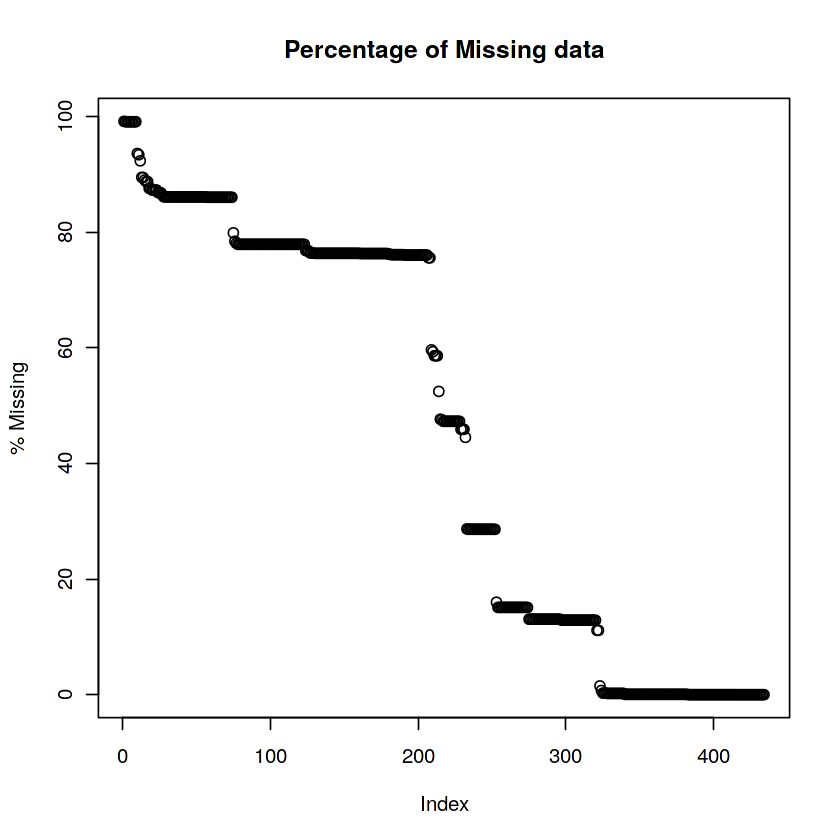

In [9]:
train_missing_percent=(colSums(is.na(train))/nrow(train))*100
train_miss_Percent_DF=data.frame(colnames(train),train_missing_percent)
colnames(train_miss_Percent_DF)<-c("Variable","MissPercentage")
train_miss_Percent_DF=train_miss_Percent_DF[order(train_miss_Percent_DF$MissPercentage,decreasing = TRUE), ]
train_miss_Percent_DF
plot(train_miss_Percent_DF$MissPercentage, ylab = "% Missing", main = "Percentage of Missing data")

In [ ]:
over_99_miss_percentage_col <- c("id_24","id_25","id_07","id_08","id_21","id_26","id_22","id_23","id_27") 
for(i in over_99_miss_percentage_col){
  train[,i] = NULL
}

In [ ]:
test_missing_percent=(colSums(is.na(test))/nrow(test))*100
test_miss_Percent_DF=data.frame(colnames(test),test_missing_percent)
colnames(test_miss_Percent_DF)<-c("Variable","MissPercentage")
test_miss_Percent_DF=test_miss_Percent_DF[order(test_miss_Percent_DF$MissPercentage,decreasing = TRUE), ]
plot(test_miss_Percent_DF$MissPercentage, ylab = "% Missing", main = "Percentage of Missing data")
train_over_99_miss_percentage_col <- c("id-24","id-25","id-07","id-08","id-21","id-26","id-22","id-23","id-27") 
for(i in train_over_99_miss_percentage_col){
  test[,i] = NULL
}

In [ ]:
write.csv(train,'train.csv')
write.csv(test,'test.csv')
